In [11]:


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [12]:
# Load dataset
df = pd.read_csv('SMSSpamCollection.csv', encoding='latin-1', header=None)

In [13]:
print(df.head())

      0                                                  1
0     0                                                  1
1   ham  Go until jurong point, crazy.. Available only ...
2   ham                      Ok lar... Joking wif u oni...
3  spam  Free entry in 2 a wkly comp to win FA Cup fina...
4   ham  U dun say so early hor... U c already then say...


In [14]:
df

,0,1
0,0,1
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ÃÂ¼ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [15]:
df = df.drop(0).reset_index(drop=True)

In [16]:
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [17]:
print(df.columns)

Index([0, 1], dtype='int64')


In [18]:
# Display the first few rows
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5572, 2)


##we perform these  steps 
#data cleaning 
#EDa 
#text preporcessing 
#model building 
#evaluation 
#website 
#Deployment 

In [20]:

#rename 
df.rename(columns = {0 :'target', 1:'text'}, inplace = True)



In [21]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ÃÂ¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df['target']=encoder.fit_transform(df['target'])

In [24]:
df   #0 = ham , 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ÃÂ¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [25]:
# check missing value 

df.isna().sum()

target    0
text      0
dtype: int64

In [26]:
df.duplicated().sum()

403

In [27]:

df.drop_duplicates(keep = 'first' , inplace = True)

### EDA

In [28]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.shape

(5169, 2)

In [30]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [31]:

import matplotlib.pyplot as plt 

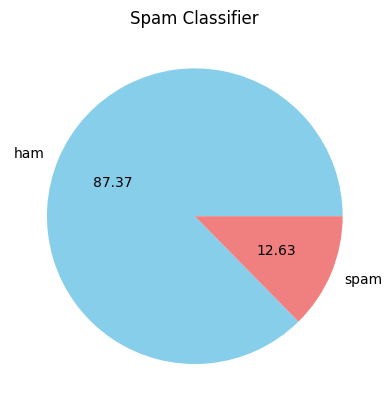

In [32]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f', colors=['skyblue', 'lightcoral'])
plt.title('Spam Classifier')
plt.show()


In [33]:

import nltk

In [34]:

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:

df['num_character']=df['text'].apply(len)

In [36]:

df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,163
5568,0,Will ÃÂ¼ b going to esplanade fr home?,39
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [37]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:

df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)


In [39]:

df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [40]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,163,35,4
5568,0,Will ÃÂ¼ b going to esplanade fr home?,39,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [41]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,79.706326,18.578062,1.974076
std,58.651259,13.398272,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#ham
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,71.135961,17.250664,1.827724
std,56.781426,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#spam
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,138.977029,27.758040,2.986217
std,30.211744,6.993618,1.494815
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


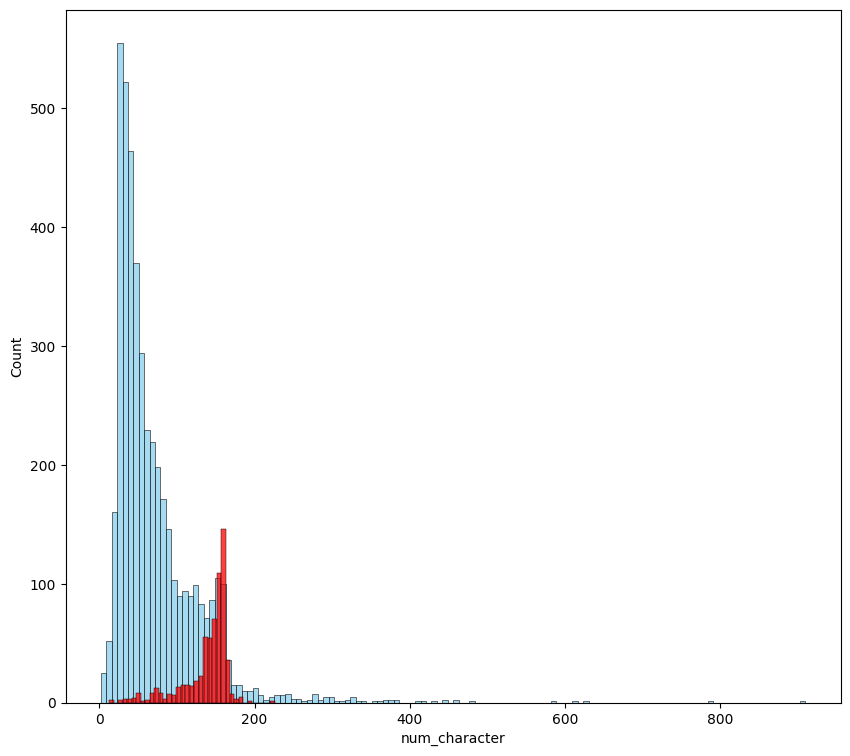

In [44]:

plt.figure(figsize=(10,9))
sns.histplot(df[df['target']==0]['num_character'], color = 'skyblue')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

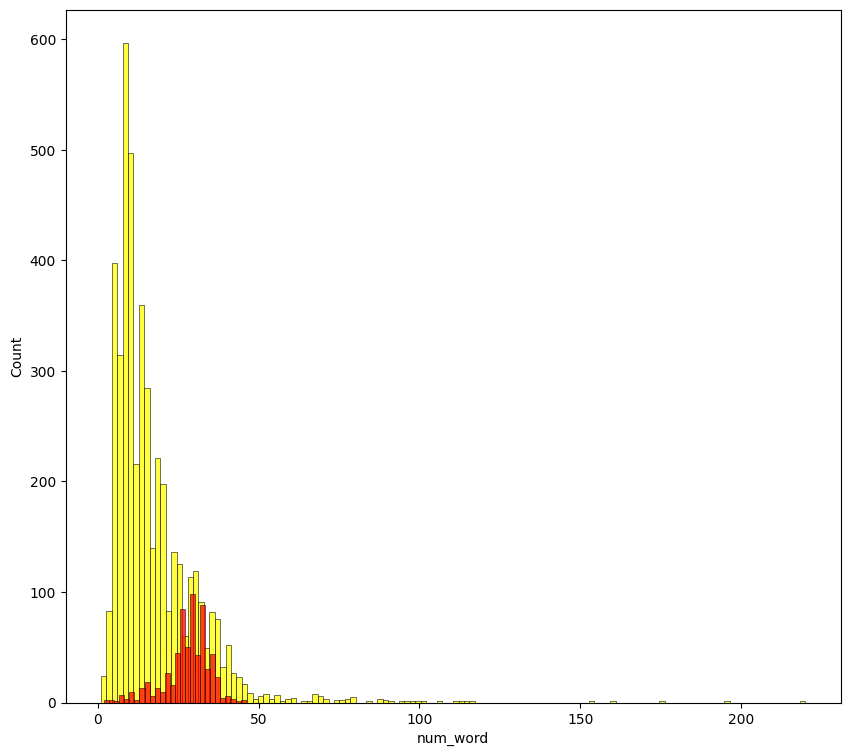

In [45]:

plt.figure(figsize=(10,9))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

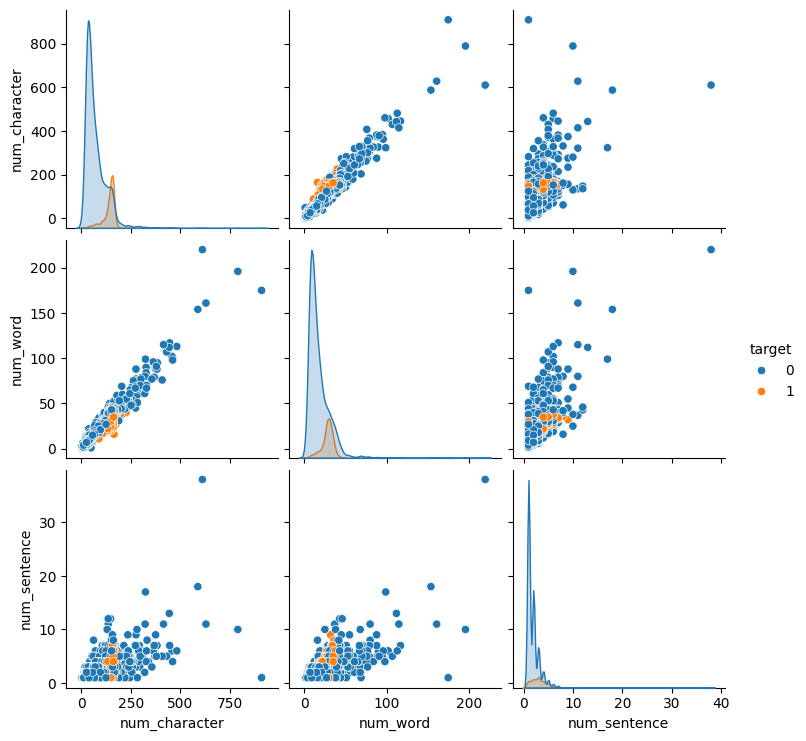

In [46]:

sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

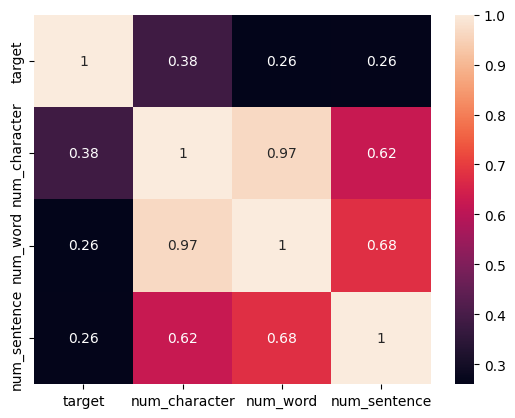

In [47]:

#to see correlation matrix 
df_correl = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_correl.corr() , annot = True)


### Data Preprocess 
#lower case 
#tokenization 
#remove special character 
#remove stopwords 
#stemming 

In [48]:




import string 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)


In [49]:

transform_text('HI I am interested in learning AI.are you?')

'hi interest learn'

In [50]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:

ps.stem('danceing')

'danc'

In [54]:

df['transformed_text']=df['text'].apply(transform_text)

In [55]:



df#

,target,text,num_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,163,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ÃÂ¼ b going to esplanade fr home?,39,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [56]:
#word cloud

from wordcloud import WordCloud

wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color ='grey')


In [57]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

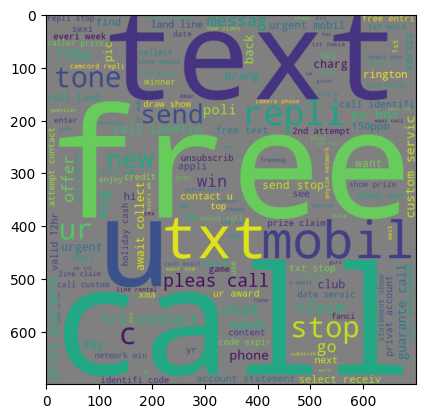

In [58]:

plt.imshow(spam_wc)

In [59]:

#word cloud for ham 

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

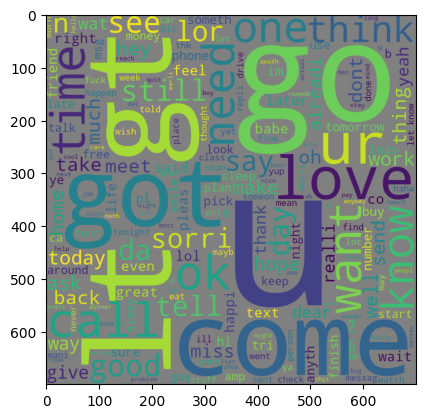

In [60]:

plt.imshow(ham_wc)

In [61]:
#top 50 words 

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:

len(spam_corpus)

9975

In [63]:

from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [64]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:

len(ham_corpus)

35757

In [66]:

pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


### ML Model Building

In [67]:

from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2500)

In [68]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

print(X.shape)

(5169, 2500)


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X.shape



(5169, 2500)

In [72]:

y = df['target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:

from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [76]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 

In [77]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
svc=SVC(kernel="sigmoid", gamma=1.0)
lrc=LogisticRegression(solver="liblinear", penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)



In [78]:
clfs={
    "SVC":svc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc
}

In [79]:

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred1)}")
print(f"Precision Score: {precision_score(y_test, y_pred1):.2f}")

Accuracy Score: 0.86
Confusion Matrix:
 [[781 127]
 [ 19 107]]
Precision Score: 0.46


In [80]:

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred2)}")
print(f"Precision Score: {precision_score(y_test, y_pred2):.2f}")

Accuracy Score: 0.98
Confusion Matrix:
 [[906   2]
 [ 17 109]]
Precision Score: 0.98


In [81]:

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3):.2f}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred3)}")
print(f"Precision Score: {precision_score(y_test, y_pred3):.2f}")

Accuracy Score: 0.98
Confusion Matrix:
 [[906   2]
 [ 20 106]]
Precision Score: 0.98


In [82]:

def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [83]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9661508704061895, 0.9333333333333333)

In [84]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print(" ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

  SVC
Accuracy -  0.9661508704061895
Precision -  0.9333333333333333
  NB
Accuracy -  0.9816247582205029
Precision -  0.9819819819819819
  DT
Accuracy -  0.9400386847195358
Precision -  0.872093023255814
  LR
Accuracy -  0.9622823984526112
Precision -  0.967741935483871
  RF
Accuracy -  0.9748549323017408
Precision -  0.9807692307692307


C:\Users\Suraj\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.9439252336448598
  BgC
Accuracy -  0.9622823984526112
Precision -  0.8918918918918919
  ETC
Accuracy -  0.971953578336557
Precision -  0.970873786407767


In [86]:
p_df=pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores}).sort_values("Precision",ascending=False)

In [87]:

p_df

,Algorithm,Accuracy,Precision
1,NB,0.981625,0.981982
4,RF,0.974855,0.980769
7,ETC,0.971954,0.970874
3,LR,0.962282,0.967742
5,AdaBoost,0.970019,0.943925
0,SVC,0.966151,0.933333
6,BgC,0.962282,0.891892
2,DT,0.940039,0.872093


In [90]:
p_df1=pd.melt(p_df, id_vars="Algorithm")

In [91]:
p_df1

,Algorithm,variable,value
0,NB,Accuracy,0.981625
1,RF,Accuracy,0.974855
2,ETC,Accuracy,0.971954
3,LR,Accuracy,0.962282
4,AdaBoost,Accuracy,0.970019
5,SVC,Accuracy,0.966151
6,BgC,Accuracy,0.962282
7,DT,Accuracy,0.940039
8,NB,Precision,0.981982
9,RF,Precision,0.980769


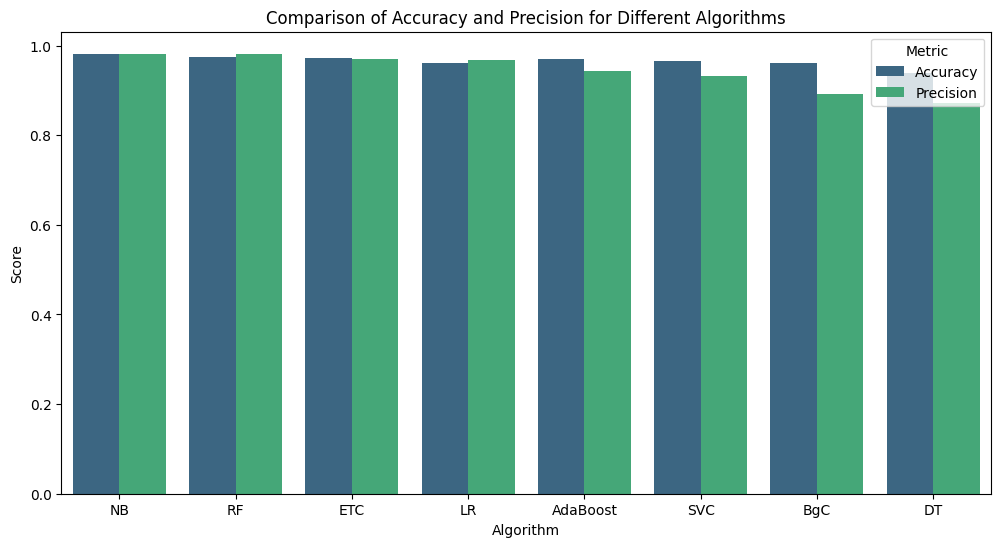

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=p_df1, x="Algorithm", y="value", hue="variable", palette="viridis")
plt.title('Comparison of Accuracy and Precision for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

     

In [97]:
p_df2=pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy_max_ft_2500":accuracy_scores, "Precision_max_ft_2500":precision_scores}).sort_values("Precision_max_ft_2500",ascending=False)

In [98]:
p_df2

,Algorithm,Accuracy_max_ft_2500,Precision_max_ft_2500
1,NB,0.981625,0.981982
4,RF,0.974855,0.980769
7,ETC,0.971954,0.970874
3,LR,0.962282,0.967742
5,AdaBoost,0.970019,0.943925
0,SVC,0.966151,0.933333
6,BgC,0.962282,0.891892
2,DT,0.940039,0.872093


In [99]:
np_df = p_df.merge(p_df2, on="Algorithm")

In [100]:
np_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_2500,Precision_max_ft_2500
0,NB,0.981625,0.981982,0.981625,0.981982
1,RF,0.974855,0.980769,0.974855,0.980769
2,ETC,0.971954,0.970874,0.971954,0.970874
3,LR,0.962282,0.967742,0.962282,0.967742
4,AdaBoost,0.970019,0.943925,0.970019,0.943925
5,SVC,0.966151,0.933333,0.966151,0.933333
6,BgC,0.962282,0.891892,0.962282,0.891892
7,DT,0.940039,0.872093,0.940039,0.872093


In [116]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [117]:
# Initialize models
svc = SVC(kernel="sigmoid", gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rf = RandomForestClassifier(n_estimators=100, random_state=2) 


In [125]:

# Initialize Voting Classifier
vot_clf = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc), ('rf', rf)], voting='soft')



In [126]:
# Fit the model
vot_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rf', RandomForestClassifier(random_state=2))],
                 voting='soft')

In [127]:
# Predict and evaluate for vating
y_pred = vot_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Voting Classifier Precision:", precision_score(y_test, y_pred))

Voting Classifier Accuracy: 0.9796905222437138
Voting Classifier Precision: 0.9906542056074766


In [128]:


#applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc), ('rf', rf)]
final_estimator=RandomForestClassifier()
     

In [129]:
st_clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [130]:
# Predict and evaluate for stacking
st_clf.fit(X_train,y_train)
y_pred=st_clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9568965517241379


In [137]:

import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(mnb, file)
    
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [132]:
df['transformed_text'][4532]

'wish thing differ wonder abl show much valu pl continu brisk walk drug without askin pleas find thing laugh love dearli'

In [136]:

df.sample(15)

,target,text,num_character,num_word,num_sentence,transformed_text
4894,0,Send me the new number,22,5,1,send new number
5379,0,Somebody set up a website where you can play h...,80,15,1,somebodi set websit play hold em use eve onlin...
1097,1,Dear Subscriber ur draw 4 ÃÂ£100 gift voucher...,144,28,3,dear subscrib ur draw 4 gift voucher b enter r...
3161,0,How much did ur hdd casing cost.,32,8,1,much ur hdd case cost
676,0,"I dont knw pa, i just drink milk..",34,10,1,dont knw pa drink milk
4819,0,How's ur paper?,15,5,1,ur paper
3960,0,Have a nice day my dear.,24,7,1,nice day dear
208,0,"Aight yo, dats straight dogg",28,6,1,aight yo dat straight dogg
504,0,Lolnice. I went from a fish to ..water.?,40,12,3,lolnic went fish water
2686,1,URGENT! We are trying to contact U. Todays dra...,160,32,5,urgent tri contact today draw show prize guara...
